<a href="https://colab.research.google.com/github/shuhbam199/FebGithub/blob/main/Porter_delivery_time%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Defining the problem statements and where can this and modifications of this be used?


Predict the delivery time taken by partner to deliver any item from shop to the customer considering the market area, category of store, number of items, and other important info available in fields given.

# Get data

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('porter.csv')

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
df['store_primary_category'].fillna('unknown', inplace = True)

<ipython-input-7-ffe598ffc22c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_primary_category'].fillna('unknown', inplace = True)


# Feature engineering

In [ ]:
# calculate actual time taken
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['time_taken'] = df['actual_delivery_time']- df['created_at']
df['time_taken'] = np.round(df['time_taken'].dt.total_seconds()/60,2)

In [ ]:
# Extract hour of the day and day of the week, month, year
df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek
# Extract hour of the day and day of the week
df['order_month'] = df['created_at'].dt.month
df['order_year'] = df['created_at'].dt.year



# Encode the categorical fields

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col)


store_id
store_primary_category


In [ ]:
#target_encode
df['store_cat_encoded'] = np.round(df.groupby('store_primary_category')['order_hour'].transform('mean'),2)
df['store_cat_encoded']= np.where(df['store_primary_category'] == 'tapas',6.39,df['store_cat_encoded'])
df['store_cat_encoded']= np.where(df['store_primary_category'] == 'german',7.53,df['store_cat_encoded'])
df['store_cat_encoded']= np.where(df['store_primary_category'] == 'burger',8.40,df['store_cat_encoded'])

In [ ]:
store_enco = df[['store_primary_category', 'store_cat_encoded']].drop_duplicates()
df.drop('store_primary_category', axis = 1, inplace = True)

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col)

store_id


In [ ]:
df2 = df.copy()
df2.drop(['created_at','actual_delivery_time'], axis =1, inplace = True)

In [ ]:
# un necessary field
df2.drop(['store_id'],axis = 1, inplace = True)


In [ ]:
df2.dropna(inplace = True)

In [ ]:
len(df2)

197419

In [ ]:
df2.head(10)

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,order_hour,order_day_of_week,order_month,order_year,store_cat_encoded
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.98,22,4,2,2015,9.09
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.07,21,1,2,2015,8.51
2,3.0,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.68,20,3,1,2015,8.11
3,3.0,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.25,21,1,2,2015,8.11
4,3.0,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.83,2,6,2,2015,8.11
5,3.0,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,38.33,20,2,1,2015,8.11
6,3.0,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,26.40,2,5,1,2015,8.11
7,3.0,1.0,4,4850,4,750,1800,7.0,8.0,7.0,32.75,3,3,2,2015,8.11
8,2.0,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.43,0,0,2,2015,6.43
9,3.0,1.0,2,2100,2,700,1200,2.0,2.0,2.0,53.20,1,2,2,2015,8.11


# Fill null values

In [ ]:
no_partners = df[df['total_onshift_partners'] == 0]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='order_hour', ylabel='Count'>

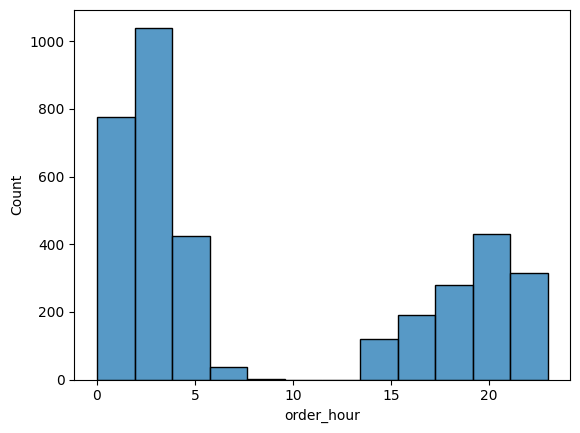

In [ ]:
no_partners = df[df['total_onshift_partners'] == 0]
sns.histplot(x = 'order_hour', data = no_partners, bins = 12)

<Axes: xlabel='order_hour', ylabel='Count'>

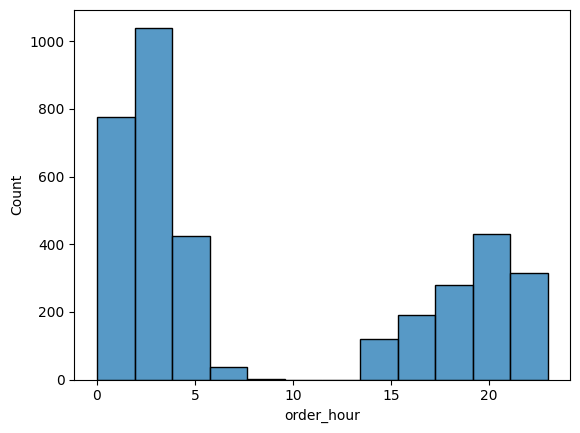

In [ ]:
no_market = df2[df2['market_id'].isna()]
sns.histplot(x = 'order_hour', data = no_partners, bins = 12)

<Axes: xlabel='order_hour', ylabel='Count'>

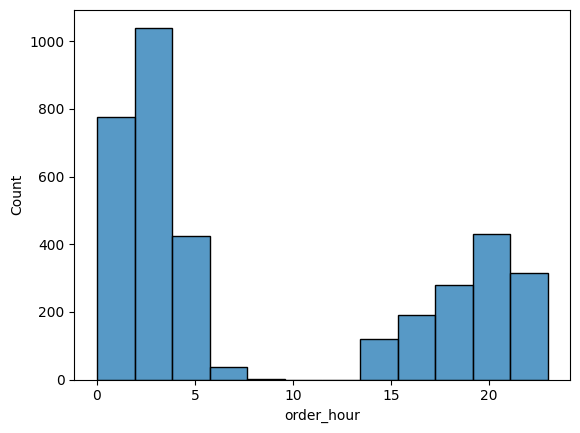

In [ ]:
no_protocol = df2[df2['order_protocol'].isna()]
sns.histplot(x = 'order_hour', data = no_partners, bins = 12)

as per above data most of the missing information is between time 0 to 4 am. so lets fill missing with mode from that section.

In [ ]:
null_partners = df[df['total_onshift_partners'].isna()]

<Axes: xlabel='order_hour', ylabel='Count'>

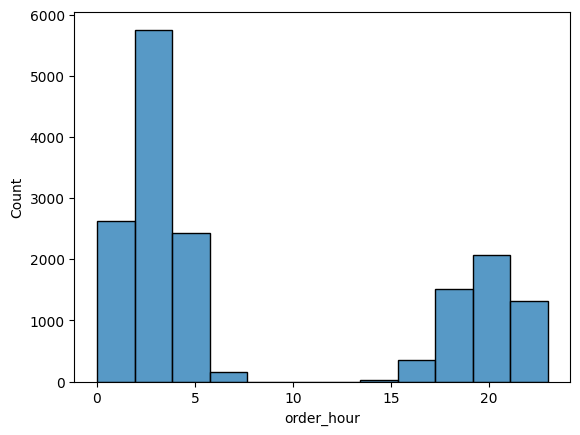

In [ ]:
sns.histplot(x = 'order_hour', data = null_partners, bins = 12)

In [ ]:
def mode_impute(series):
    mode_value = series.mode()
    return mode_value[0] if not mode_value.empty else None  # Get first mode if multiple

# Compute mode of 'market_id' for each 'order_hr'
mode_per_hour = df2.groupby('order_hour')['market_id'].transform(mode_impute)

# Fill NaN values in 'market_id' with corresponding mode
df2['market_id'].fillna(mode_per_hour, inplace=True)



def mode_impute(series):
    mode_value = series.mode()
    return mode_value[0] if not mode_value.empty else None  # Get first mode if multiple

# Compute mode of 'market_id' for each 'order_hr'
mode_per_hour = df2.groupby('order_hour')['order_protocol'].transform(mode_impute)

# Fill NaN values in 'market_id' with corresponding mode
df2['order_protocol'].fillna(mode_per_hour, inplace=True)


<ipython-input-24-340627ae5ae3>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['market_id'].fillna(mode_per_hour, inplace=True)
<ipython-input-24-340627ae5ae3>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
def mode_impute(series):
    mode_value = series.mode()
    return mode_value[0] if not mode_value.empty else None  # Get first mode if multiple

# Compute mode of 'market_id' for each 'order_hr'
mode_onshift = df2.groupby(['market_id','order_hour'])['total_onshift_partners'].transform(mode_impute)
mode_busy = df2.groupby(['market_id','order_hour'])['total_busy_partners'].transform(mode_impute)
mode_outstanding = df2.groupby(['market_id','order_hour'])['total_outstanding_orders'].transform(mode_impute)


df2['total_outstanding_orders'].fillna(mode_outstanding, inplace=True)
df2['total_busy_partners'].fillna(mode_busy, inplace=True)
df2['total_onshift_partners'].fillna(mode_onshift, inplace=True)

<ipython-input-25-1bd580b067ba>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['total_outstanding_orders'].fillna(mode_outstanding, inplace=True)
<ipython-input-25-1bd580b067ba>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

# Outlier detection and Removal
Outliers can make model overfit, giving high accuracy in training but very low accouracy in actual test data as model fits every noisy point and does not follow the generalised pattern over the duration.

Methods to remove
1) IQR
2) Iforest
3) LOF/DBScan
4) Standerd deviation

In [ ]:
df2.dropna(inplace = True)

In [ ]:
len(df2)

197419

<Axes: xlabel='time_taken'>

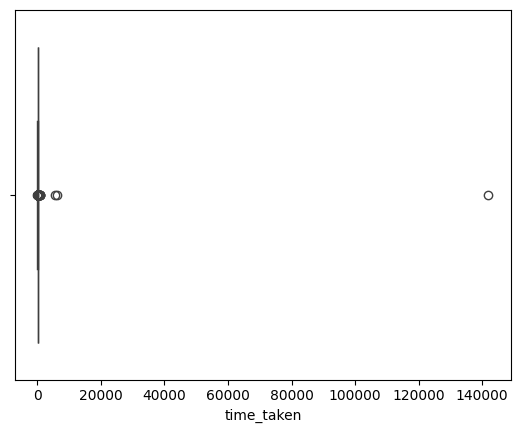

In [ ]:
sns.boxplot( x = 'time_taken', data = df2)

<Axes: xlabel='total_items'>

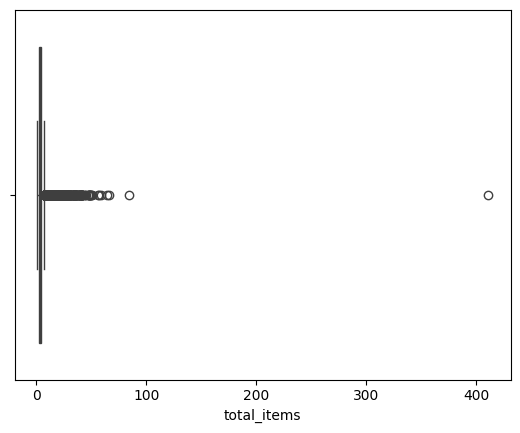

In [ ]:
sns.boxplot( x = 'total_items', data = df2)

<Axes: xlabel='subtotal'>

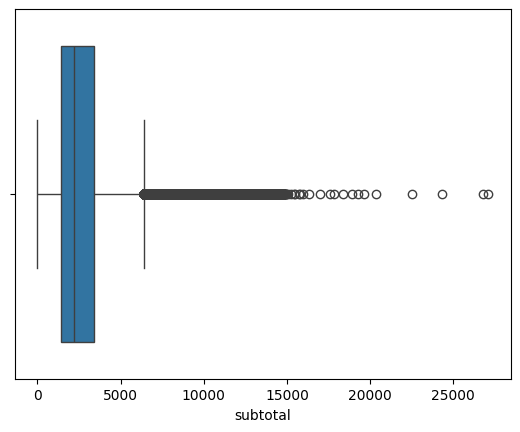

In [ ]:
sns.boxplot( x = 'subtotal', data = df2)

<Axes: xlabel='num_distinct_items'>

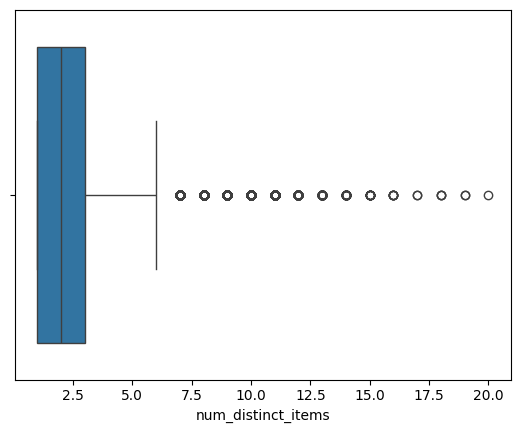

In [ ]:
sns.boxplot( x = 'num_distinct_items', data = df2)

In [ ]:
df3 = df2.copy()
def outlier_removal(df2,col):
  q1 = df2[col].quantile(0.25)
  q3 = df2[col].quantile(0.75)
  iqr = q3 - q1
  lower_limit = q1 - (1.75*iqr)
  upper_limit = q3 + (1.75*iqr)
  df2 = df2[(df2[col]> lower_limit) & (df2[col]< upper_limit)]
  return df2

In [ ]:
df4 = outlier_removal(df3,'time_taken')
df5 = outlier_removal(df4,'total_items')

In [ ]:
len(df5)

183703

<Axes: xlabel='total_items'>

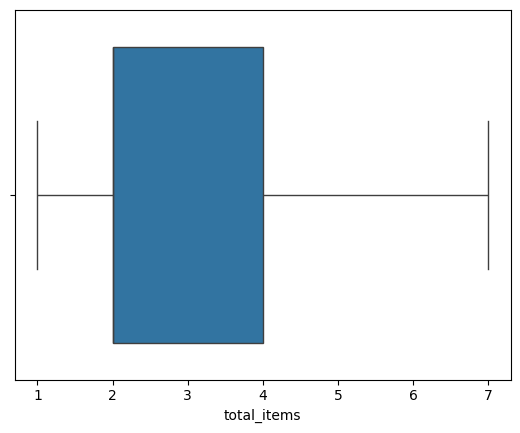

In [ ]:
sns.boxplot( x = 'total_items', data = df5)

<Axes: xlabel='time_taken'>

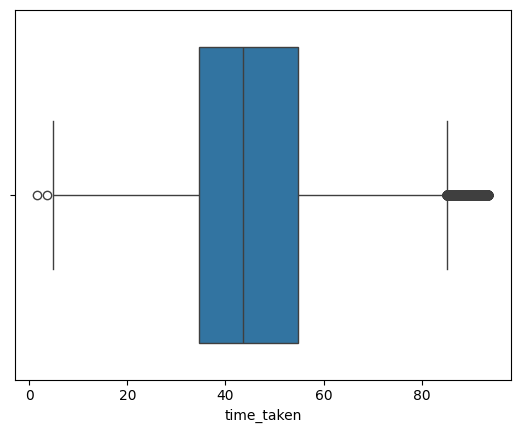

In [ ]:
sns.boxplot( x = 'time_taken', data = df5)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x=df5.drop('time_taken',axis=1)
y=df5['time_taken']
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# Scale the data

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Build the Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers, regularizers

Trial 5 Complete [00h 03m 30s]
val_mae: 10.38364028930664

Best val_mae So Far: 0.0
Total elapsed time: 00h 34m 30s
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18371/18371 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 1495.8258 - mae: 33.8618 - val_loss: 195.0798 - val_mae: 11.0520
Epoch 2/10
18371/18371 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 207.9467 - mae: 11.3916 - val_loss: 188.5432 - val_mae: 10.8939
Epoch 3/10
18371/18371 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 201.9798 - mae: 11.2183 - val_loss: 185.0425 - val_mae: 10.7260
Epoch 4/10
18371/18371 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 199.1162 - mae: 11.1559 - val_loss: 182.2159 - val_mae: 10.6438
Epoch 5/10
18371/18371 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - loss: 198.1319 - mae: 11.1309 - val_loss: 180.5455 - val_mae: 10.6320
Epoch 6/10
18371/18371 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - loss: 194.9873 - mae: 11.0198 - val_loss: 180.6626 - val_mae: 10.6112
Epoch 7/10
18371/18371 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - loss: 195.0182 - mae: 11.0167 - val_loss: 178.9582 - val_mae: 10.5105
Epoch 8/10
18371/18371 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 193.9112 - mae: 10.9979 - val_loss: 179.00

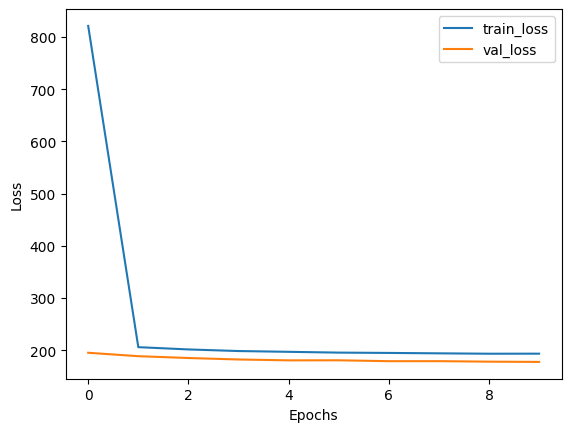

1149/1149 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MSE: 177.53769322810368
RMSE: 13.3243271210258
MAE: 10.497093196526372


In [ ]:
def build_model(hp):
    model = keras.Sequential()

    # First Dense Layer
    model.add(layers.Dense(hp.Int('units_1', min_value=32, max_value=128, step=32),
                           activation='relu',
                           input_shape=(x_train_scaled.shape[1],)))
    model.add(BatchNormalization())
    model.add(layers.Dropout(hp.Choice('dropout_1', [0.1, 0.2])))

    # Second Dense Layer
    model.add(layers.Dense(hp.Int('units_2', min_value=16, max_value=64, step=16),
                           activation='relu',
                           kernel_regularizer=regularizers.l2(hp.Choice('l2_1', [0.0001, 0.001]))))
    model.add(BatchNormalization())
    model.add(layers.Dropout(hp.Choice('dropout_2', [0.1, 0.2])))

    # Third Dense Layer
    model.add(layers.Dense(hp.Int('units_3', min_value=8, max_value=16, step=8),
                           activation='relu',
                           kernel_regularizer=regularizers.l2(hp.Choice('l2_2', [0.0001, 0.001]))))  # Fixed l2 key
    model.add(BatchNormalization())

    # Output Layer
    model.add(layers.Dense(1))

    # Compile Model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.01, 0.001])),
                  loss='mse',
                  metrics=['mae'])  # Fixed incorrect accuracy metric

    return model

# Hyperparameter search
tuner = kt.RandomSearch(build_model, objective='val_mae', max_trials=5, executions_per_trial=1)  # Fixed objective
tuner.search(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=10, batch_size=32)

# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train final model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    min_delta=0.001  # Stop if the improvement in loss is less than 0.001
)

history = best_model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=10, batch_size=8, verbose=1, callbacks=[early_stop])

# Plot loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model
y_pred = best_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


In [ ]:
best_hps.values

{'units_1': 96,
 'units_2': 32,
 'units_3': 32,
 'learning_rate': 0.0001,
 'dropout_1': 0.1,
 'l2_1': 0.0001,
 'dropout_2': 0.1,
 'l2_2': 0.0001}

# Leading Questions:

Defining the problem statements and where can this and modifications of this be used?
List 3 functions the pandas datetime provides with one line explanation.
Short note on datetime, timedelta, time span (period)
Why do we need to check for outliers in our data?
Name 3 outlier removal methods?
What classical machine learning methods can we use for this problem?
Why is scaling required for neural networks?
Briefly explain your choice of optimizer.
Which activation function did you use and why?
Why does a neural network perform well on a large dataset?


# Defining the problem statements and where can this and modifications of this be used?


Its about predicting the delivery time taken by partner to deliver any item from shop to the customer considering the market area, category of store, number of items, and other important info available in fields given.

# List 3 functions the pandas datetime provides with one line explanation. Short note on datetime, timedelta, time span (period)


1) pd.to_datetime(): convert string to date time
2) dt.dayofweek(): gives day of week
3) dt.strftime(): Formats datetime values into string format.


datetime : Represents a specific point in time.
timedelta Represents a difference or duration between two datetime values
Period:  Represents a time span such as a month or year

# Why do we need to check for outliers in our data? Name 3 outlier removal methods?

Outliers can make model overfit, giving high accuracy in training but very low accouracy in actual test data as model fits every noisy point and does not follow the generalised pattern over the duration.

Methods to remove
1) IQR
2) Iforest
3) LOF/DBScan
4) Standerd deviation

# What classical machine learning methods can we use for this problem?

1) Polynomial regression for smaller data.
2) Random forest Regressor or Xgboost(Or Ensembling methods) for better accuarcy

# Why is scaling required for neural networks?

If we dont scale the data, the model will give high weightage to fields with higher values and lower weightage to fields with lower values, leading to biasness towards some high value fields, for example:

Engine Power (HP): 100 - 500
Weight (kg): 800 - 2500
Mileage (km/l): 5 - 30
Age (years): 1 - 15
Since Weight (kg) has much larger numerical values than Mileage (km/l) or Age (years), the model may give disproportionate importance to weight while ignoring the impact of mileage and age unless we scale the data properly.

# Briefly explain your choice of optimizer.

Adam optimizer as it takes care move fast convergence towards global minima also handle sparse data and noisy gradients.

 # Which activation function did you use and why?

 Relu activation as it is a regression problem and it works well as it avoids vanishing gradient problem which can be observed in other activations like tanh.

# Why does a neural network perform well on a large dataset?

Becasuse it learns from the data, it learns complex relations between data points and takes care for feature selection part by itself. It learn the generalised pattern, avoids overfitting or underfitting with use of optimization and reguralizers.